# Random Graph with different steps (linear, regular)

In [1]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import pickle
import copy

In [2]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/wikivote.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/wikivote.gpickle


In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 2216
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4899
influencer {5761, 2308, 3589, 5380, 5516, 3726, 1940, 6805, 2708, 2839, 3358, 3619, 4133, 807, 1320, 5289, 3242, 6441, 424, 7214, 6703, 1461, 6199, 444, 2110, 1602, 7235, 2116, 8261, 6598, 1737, 7632, 8272, 721, 5970, 3799, 8163, 1892, 4324, 2922, 365, 2671, 4720, 3569, 1650, 6004, 4214, 4855, 888, 5757}


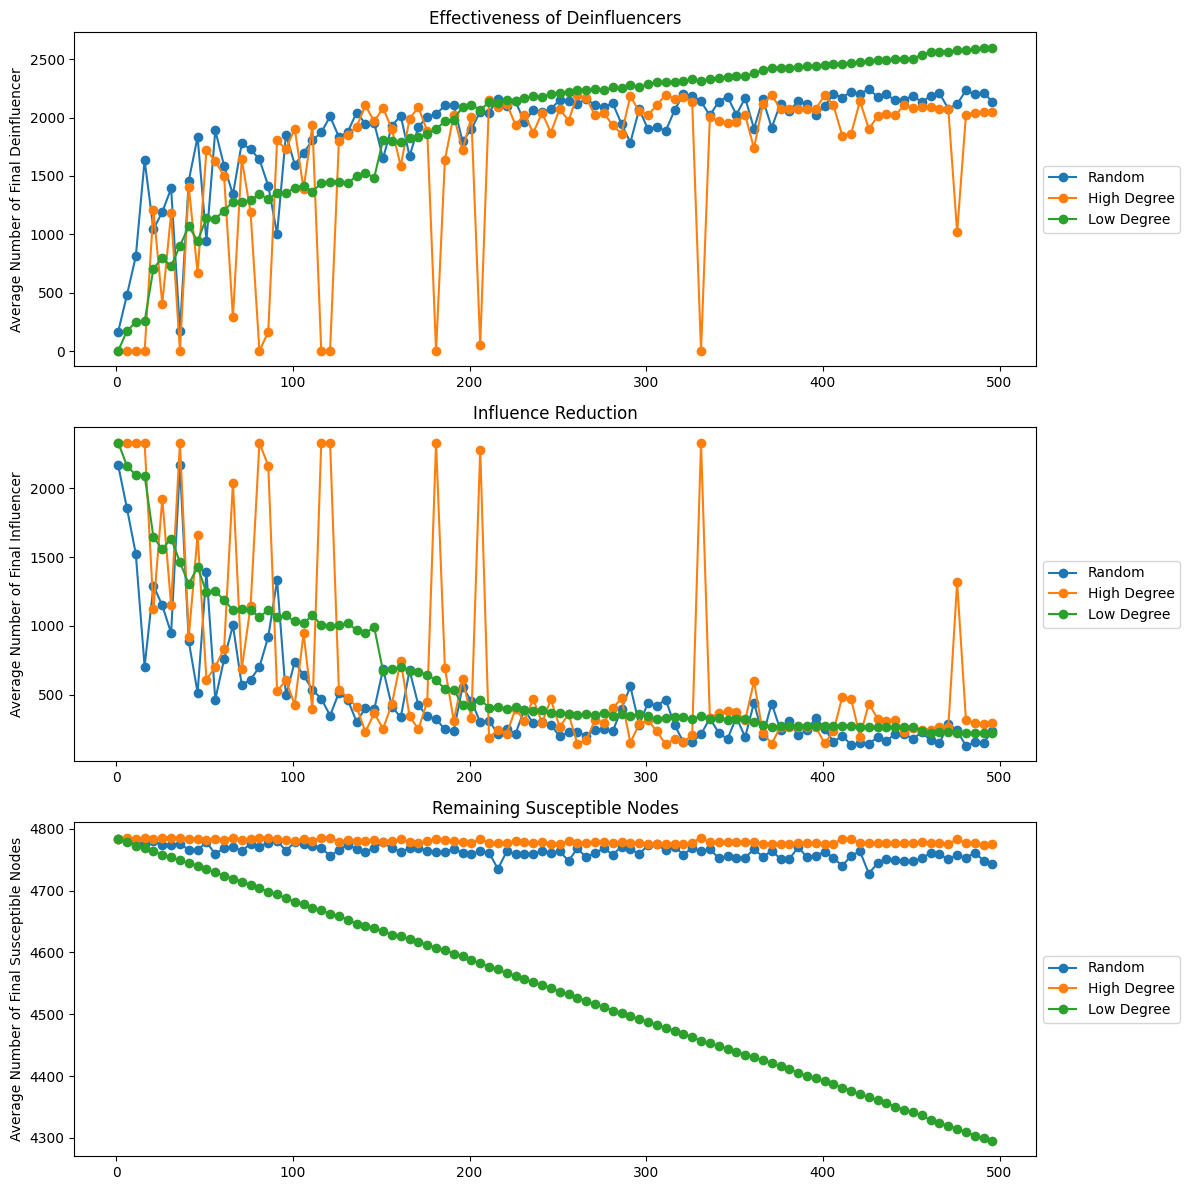

In [4]:
budget_list = list(range(1, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=5, steps=3)
ef.plot_deinfluencer_results_exp2(results, G)